In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from datetime import datetime

In [123]:
gold = yf.download(tickers = 'GC=F',
                     period = 'max',
                     interval = '1d').reset_index()

gold = gold.rename(columns = {'Open': 'gold_open', 'High': 'gold_high', 'Low': 'gold_low', 'Close': 'gold_close', 'Adj Close': 'gold_adj_close', 'Volume': 'gold_volume'})
gold.head()

[*********************100%%**********************]  1 of 1 completed


,Date,gold_open,gold_high,gold_low,gold_close,gold_adj_close,gold_volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [124]:
uero_usd = yf.download(tickers = 'EURUSD=X' , period = 'max' , interval = '1d').reset_index()
uero_usd = uero_usd.rename(columns = {'Open': 'euro_usd_open' , 'High' : 'euro_usd_high' , 'Low': 'euro_usd_low' , 'Close':'euro_usd_close' , 'Adj Close':'euro_usd_adj_close' , 'Volume': 'euro_usd_volume'})
uero_usd.head()

[*********************100%%**********************]  1 of 1 completed


,Date,euro_usd_open,euro_usd_high,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0


In [125]:
sp500 = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d").reset_index()
sp500 = sp500.rename(columns={'Open': 'sp500_open', 'High': 'sp500_high', 'Low': 'sp500_low', 'Close': 'sp500_close', 'Adj Close': 'sp500_adj_close', 'Volume': 'sp500_volume'})
sp500.head()

[*********************100%%**********************]  1 of 1 completed


,Date,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [126]:
xmr = yf.Ticker("XMR-USD")
df = yf.download(tickers = 'XMR-USD' ,
                 period = 'max',
                 interval = '1d').reset_index()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000


In [127]:
df.loc[0 , 'price_increase'] = 0
for i in range(1, len(df)):
  df.loc[i , 'price_increase'] = 1 if df.loc[i-1 , 'Close'] < df.loc[i , 'Close'] else 0
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,price_increase
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0.0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,0.0
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1.0
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,1.0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0.0


In [128]:
df = df.merge(gold , on='Date' , how = 'left').merge(uero_usd , on ='Date' , how = 'left').merge(sp500 , on = 'Date' , how = 'left')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,price_increase,gold_open,gold_high,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0.0,1279.699951,1286.900024,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,0.0,1283.500000,1283.500000,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0.0,1277.300049,1277.300049,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


<Axes: ylabel='Frequency'>

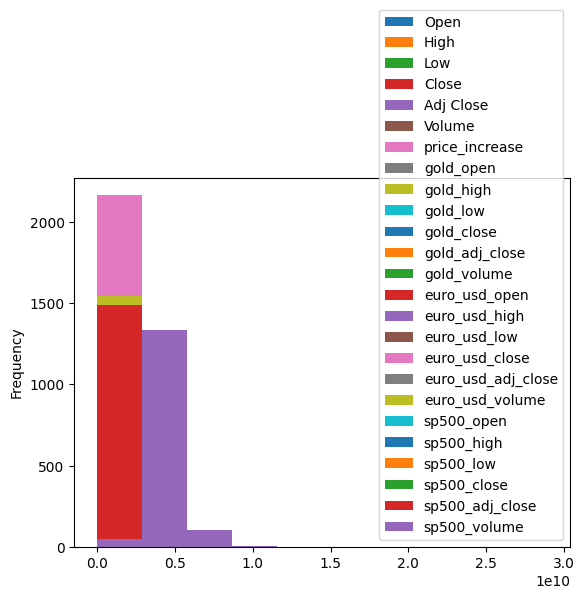

In [129]:
df.plot(kind = 'hist')

In [130]:
!gdown 11NUjXNzuFnBd0MShJYq-RlrFeepMHUrA
!gdown 1WUNRZJgU0f5NaC-6Z0n_mMvt6P9yNV1U

Downloading...
From: https://drive.google.com/uc?id=11NUjXNzuFnBd0MShJYq-RlrFeepMHUrA
To: /content/XMR_hash.csv
100% 181k/181k [00:00<00:00, 84.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WUNRZJgU0f5NaC-6Z0n_mMvt6P9yNV1U
To: /content/XMR_difficulty.csv
100% 213k/213k [00:00<00:00, 120MB/s]


In [131]:
date_parser = lambda x: datetime.strptime(x , "%Y-%m-%dT%H:%M:%SZ").date()\

xmr_hash = pd.read_csv('./XMR_hash.csv' , index_col = 0 , parse_dates = ["time"] , date_parser = date_parser)
xmr_difficulty = pd.read_csv('./XMR_difficulty.csv' , index_col = 0 , parse_dates = ['time'] , date_parser = date_parser)
xmr_hash.head()

,time_stamp,hash,time
0,1.442190e+12,12514082.15,2015-09-14
1,1.442280e+12,13361330.16,2015-09-15
2,1.442360e+12,13065948.13,2015-09-16
3,1.442450e+12,12663854.33,2015-09-17
4,1.442530e+12,12198340.44,2015-09-18


In [132]:
xmr_difficulty.head()

,time_stamp,difficulty,time
0,1442188800000,7.508450e+08,2015-09-14
1,1442275200000,8.016798e+08,2015-09-15
2,1442361600000,7.839569e+08,2015-09-16
3,1442448000000,7.598313e+08,2015-09-17
4,1442534400000,7.319005e+08,2015-09-18


In [133]:
df = xmr_hash.sort_values(by = ['time' , 'time_stamp']).drop_duplicates(subset='time' , keep = 'last').merge(df , left_on = 'time' , right_on = 'Date')
df.head()

,time_stamp,hash,time,Date,Open,High,Low,Close,Adj Close,Volume,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1.510190e+12,233898872.2,2017-11-09,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,1.510270e+12,233778227.0,2017-11-10,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,1.510360e+12,233778227.0,2017-11-11,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.510440e+12,233778227.0,2017-11-12,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.510530e+12,233778227.0,2017-11-13,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


In [134]:
df = xmr_difficulty.sort_values(by = ['time' , 'time_stamp']).drop_duplicates(subset = 'time' , keep='last').merge(df , on = 'time')
df.head()

,time_stamp_x,difficulty,time,time_stamp_y,hash,Date,Open,High,Low,Close,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1510185600000,2.806786e+10,2017-11-09,1.510190e+12,233898872.2,2017-11-09,112.531998,123.404999,112.219002,120.779999,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,1510272000000,2.805339e+10,2017-11-10,1.510270e+12,233778227.0,2017-11-10,121.344002,121.665001,101.757004,105.585999,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,1510358400000,2.805339e+10,2017-11-11,1.510360e+12,233778227.0,2017-11-11,105.750000,127.106003,103.877998,119.615997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1510444800000,2.805339e+10,2017-11-12,1.510440e+12,233778227.0,2017-11-12,119.597000,133.675003,110.617996,123.856003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1510531200000,2.805339e+10,2017-11-13,1.510530e+12,233778227.0,2017-11-13,128.960007,136.528000,120.921997,123.402000,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


In [135]:
df.isna().sum()

time_stamp_x            0
difficulty              0
time                    0
time_stamp_y            0
hash                    0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
price_increase          0
gold_open             672
gold_high             672
gold_low              672
gold_close            672
gold_adj_close        672
gold_volume           672
euro_usd_open         619
euro_usd_high         619
euro_usd_low          619
euro_usd_close        619
euro_usd_adj_close    619
euro_usd_volume       619
sp500_open            671
sp500_high            671
sp500_low             671
sp500_close           671
sp500_adj_close       671
sp500_volume          671
dtype: int64

In [136]:
df.shape

(2151, 31)

In [137]:
df['gold_open'].fillna(0 , inplace = True)

for i in range(len(df)) :
  if df.loc[i , 'gold_open'] == 0 and i != df.shape[0] - 1:
    df.loc[i , 'gold_open'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_high'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_low'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_adj_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_volume'] = df.loc[i-1 , 'gold_volume']
  elif df.loc[i , 'gold_open'] == 0 and i != 0:
    df.loc[i , 'gold_open'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_high'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_low'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_close'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_adj_close'] = df.loc[i-1 , 'gold_close']
    df.loc[i , 'gold_volume'] = df.loc[i-1 , 'gold_volume']
  elif df.loc[i , 'gold_open'] == 0 and i == 0:
    df.loc[i , 'gold_open'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_high'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_low'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_adj_close'] = df.loc[i+1 , 'gold_open']
    df.loc[i , 'gold_volume'] = df.loc[i+1 , 'gold_volume']
df.isna().sum()

time_stamp_x            0
difficulty              0
time                    0
time_stamp_y            0
hash                    0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
price_increase          0
gold_open               0
gold_high               0
gold_low                0
gold_close              0
gold_adj_close          0
gold_volume             0
euro_usd_open         619
euro_usd_high         619
euro_usd_low          619
euro_usd_close        619
euro_usd_adj_close    619
euro_usd_volume       619
sp500_open            671
sp500_high            671
sp500_low             671
sp500_close           671
sp500_adj_close       671
sp500_volume          671
dtype: int64

In [138]:
df['euro_usd_open'].fillna(0 , inplace = True)
for i in range(len(df)):
  if df.loc[i , 'euro_usd_open'] == 0 and df.shape[0] -1 != i and i != 0:
    df.loc[i , 'euro_usd_open'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_high'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_low'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_adj_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_volume'] = df.loc[i-1 ,  'euro_usd_volume']

  elif df.loc[i , 'euro_usd_open'] == 0 and df.shape[0] -1 == i and i != 0:
    df.loc[i , 'euro_usd_open'] = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_high'] = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_low']  = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_close'] = df.loc[i-1, 'euro_usd_close']
    df.loc[i , 'euro_usd_adj_close'] = df.loc[i-1 , 'euro_usd_close']
    df.loc[i , 'euro_usd_volume'] = df.loc[i-1 , 'euro_usd_volume']

  elif df.loc[i , 'euro_usd_open'] == 0 and i == 0:
    df.loc[i , 'euro_usd_open'] = df.loc[i+1 ,'euro_usd_open']
    df.loc[i , 'euro_usd_high'] = df.loc[i+1 ,'euro_usd_open']
    df.loc[i , 'euro_usd_low'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_adj_close'] = df.loc[i+1 , 'euro_usd_open']
    df.loc[i , 'euro_usd_volume'] = df.loc[i+1 , 'euro_usd_volume']
df.isna().sum()

time_stamp_x            0
difficulty              0
time                    0
time_stamp_y            0
hash                    0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
price_increase          0
gold_open               0
gold_high               0
gold_low                0
gold_close              0
gold_adj_close          0
gold_volume             0
euro_usd_open           0
euro_usd_high           0
euro_usd_low            0
euro_usd_close          0
euro_usd_adj_close      0
euro_usd_volume         0
sp500_open            671
sp500_high            671
sp500_low             671
sp500_close           671
sp500_adj_close       671
sp500_volume          671
dtype: int64

In [139]:
df['sp500_open'].fillna(0 , inplace = True)
for i in range(len(df)):
  if df.loc[i , 'sp500_open'] == 0 and df.shape[0] -1 != i and i != 0:
    df.loc[i , 'sp500_open'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_high'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_low'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_adj_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_volume'] = df.loc[i-1 ,  'sp500_volume']

  elif df.loc[i , 'sp500_open'] == 0 and df.shape[0] -1 == i and i != 0:
    df.loc[i , 'sp500_open'] = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_high'] = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_low']  = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_close'] = df.loc[i-1, 'sp500_close']
    df.loc[i , 'sp500_adj_close'] = df.loc[i-1 , 'sp500_close']
    df.loc[i , 'sp500_volume'] = df.loc[i-1 , 'sp500_volume']

  elif df.loc[i , 'sp500_open'] == 0 and i == 0:
    df.loc[i , 'sp500_open'] = df.loc[i+1 ,'sp500_open']
    df.loc[i , 'sp500_high'] = df.loc[i+1 ,'sp500_open']
    df.loc[i , 'sp500_low'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_adj_close'] = df.loc[i+1 , 'sp500_open']
    df.loc[i , 'sp500_volume'] = df.loc[i+1 , 'sp500_volume']
df.isna().sum()

time_stamp_x          0
difficulty            0
time                  0
time_stamp_y          0
hash                  0
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
price_increase        0
gold_open             0
gold_high             0
gold_low              0
gold_close            0
gold_adj_close        0
gold_volume           0
euro_usd_open         0
euro_usd_high         0
euro_usd_low          0
euro_usd_close        0
euro_usd_adj_close    0
euro_usd_volume       0
sp500_open            0
sp500_high            0
sp500_low             0
sp500_close           0
sp500_adj_close       0
sp500_volume          0
dtype: int64

In [140]:
date_range = pd.date_range(start = '2022-09-08' , end = '2023-09-07' , freq = 'D')
test = df[df['Date'].isin(date_range)]
train = df.drop(index = test.index)

In [141]:
train.shape , test.shape

((1786, 31), (365, 31))

In [142]:
train.head()

,time_stamp_x,difficulty,time,time_stamp_y,hash,Date,Open,High,Low,Close,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1510185600000,2.806786e+10,2017-11-09,1.510190e+12,233898872.2,2017-11-09,112.531998,123.404999,112.219002,120.779999,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,1510272000000,2.805339e+10,2017-11-10,1.510270e+12,233778227.0,2017-11-10,121.344002,121.665001,101.757004,105.585999,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,1510358400000,2.805339e+10,2017-11-11,1.510360e+12,233778227.0,2017-11-11,105.750000,127.106003,103.877998,119.615997,...,1.164687,0.000000,0.000000,0.0,2582.300049,2582.300049,2582.300049,0.000000,0.000000,3.489740e+09
3,1510444800000,2.805339e+10,2017-11-12,1.510440e+12,233778227.0,2017-11-12,119.597000,133.675003,110.617996,123.856003,...,0.000000,1.166113,1.166113,0.0,0.000000,0.000000,0.000000,2576.530029,2576.530029,3.489740e+09
4,1510531200000,2.805339e+10,2017-11-13,1.510530e+12,233778227.0,2017-11-13,128.960007,136.528000,120.921997,123.402000,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


In [143]:
test.head()

,time_stamp_x,difficulty,time,time_stamp_y,hash,Date,Open,High,Low,Close,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
1755,1662595200000,3.208107e+11,2022-09-08,1.662600e+12,2.673422e+09,2022-09-08,149.233353,152.426529,147.767471,152.175339,...,0.993345,0.999570,0.999570,0.0,3959.939941,4010.500000,3944.810059,4006.179932,4006.179932,3.966850e+09
1756,1662681600000,3.191583e+11,2022-09-09,1.662680e+12,2.659653e+09,2022-09-09,152.175949,159.720169,151.765671,159.720169,...,1.000931,1.001202,1.001202,0.0,4022.939941,4076.810059,4022.939941,4067.360107,4067.360107,3.901940e+09
1757,1662768000000,3.376091e+11,2022-09-10,1.662770e+12,2.813409e+09,2022-09-10,160.002502,161.677124,157.358948,157.581055,...,1.001202,0.000000,0.000000,0.0,4067.360107,4067.360107,4067.360107,0.000000,0.000000,3.901940e+09
1758,1662854400000,3.544228e+11,2022-09-11,1.662850e+12,2.953524e+09,2022-09-11,157.612946,159.213715,154.800797,158.860352,...,0.000000,1.007141,1.007141,0.0,0.000000,0.000000,0.000000,4083.669922,4083.669922,3.901940e+09
1759,1662940800000,3.523094e+11,2022-09-12,1.662940e+12,2.935912e+09,2022-09-12,158.856659,164.834427,158.242157,163.911850,...,1.006472,1.007141,1.007141,0.0,4083.669922,4119.279785,4083.669922,4110.410156,4110.410156,3.814200e+09


In [145]:
X = train.drop(columns = [ 'price_increase' , 'time'])
y = train['price_increase']

In [146]:
X.head()

,time_stamp_x,difficulty,time_stamp_y,hash,Date,Open,High,Low,Close,Adj Close,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
0,1510185600000,2.806786e+10,1.510190e+12,233898872.2,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,...,1.158641,1.159689,1.159689,0.0,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3.844100e+09
1,1510272000000,2.805339e+10,1.510270e+12,233778227.0,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,...,1.162399,1.164687,1.164687,0.0,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3.489740e+09
2,1510358400000,2.805339e+10,1.510360e+12,233778227.0,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,...,1.164687,0.000000,0.000000,0.0,2582.300049,2582.300049,2582.300049,0.000000,0.000000,3.489740e+09
3,1510444800000,2.805339e+10,1.510440e+12,233778227.0,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,...,0.000000,1.166113,1.166113,0.0,0.000000,0.000000,0.000000,2576.530029,2576.530029,3.489740e+09
4,1510531200000,2.805339e+10,1.510530e+12,233778227.0,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,...,1.163873,1.166113,1.166113,0.0,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3.405200e+09


In [147]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: price_increase, dtype: float64

In [150]:
from sklearn.model_selection import train_test_split

X_train , X_validation , y_train , y_validation = train_test_split(X, y , test_size = 0.25 , random_state = 42)
X_test = test.drop(columns = [ "price_increase" , 'time'])
y_test = test['price_increase']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier